/var/folders/7w/4xfp0lk95z523t6v8pvy_lcm0000gn/T/ipykernel_42216/777892563.py:40: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum =  np.log(np.abs(fshift_filtered) )


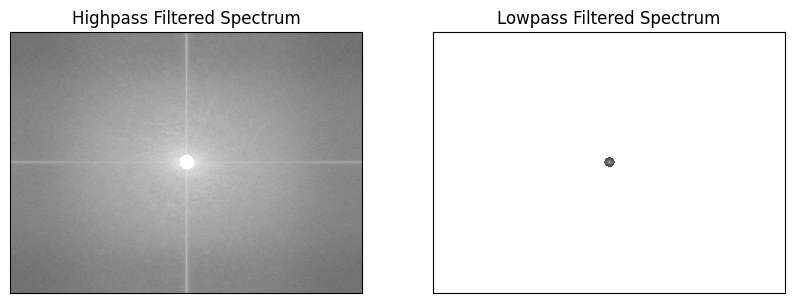

In [30]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def make_mask(img_shape, radius, highpass=True):
    height, width = img_shape
    c_x, c_y = width // 2, height // 2
    mask = np.zeros(img_shape)
    #0が入った配列を作成
    for y in range(height):
        for x in range(width):
            # 中心からの距離の2乗
            distance_sq = (x - c_x) ** 2 + (y - c_y) ** 2
            if highpass:
                # ハイパスフィルタ：中心からの距離が半径以上なら1
                if distance_sq >= radius ** 2:
                    mask[y, x] = 1
            else:
                # ローパスフィルタ：中心からの距離が半径以下なら1
                if distance_sq < radius ** 2:
                    mask[y, x] = 1
    #print(type(mask))
    return mask


def apply_filter_and_plot_spectrum(img, radius, highpass):

    # 2次元フーリエ変換とシフト
    fshift = np.fft.fftshift(np.fft.fft2(img))
    
    # マスクを作成してフィルタを適用
    mask = make_mask(img.shape, radius, highpass)
    #print(type(mask))
    #numpyの配列をかけると要素ごとにかけられる
    # フーリエスペクトルにマスクを適用
    fshift_filtered = fshift * mask
    
    
    # フーリエスペクトルの振幅を対数スケールで計算
    magnitude_spectrum =  np.log(np.abs(fshift_filtered) )  
    
    return magnitude_spectrum

# 画像をグレースケールで読み込み
img_path = '/Users/hanya/Documents/UU/3rd/late/optplo/kadai2/kadai3/F_D2gAXX0AAqTXr.jpeg'  # ここに実際の画像パスを入れてください
img = cv2.imread(img_path, 0)

# ハイパスフィルタとローパスフィルタの結果を表示
radius = 30 # フィルタリングの半径を設定
magnitude_spectrum_highpass = apply_filter_and_plot_spectrum(img, radius, highpass=True)
magnitude_spectrum_lowpass = apply_filter_and_plot_spectrum(img, radius, highpass=False)

# 結果をプロット
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(magnitude_spectrum_highpass, cmap='gray')
plt.title('Highpass Filtered Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum_lowpass, cmap='gray')
plt.title('Lowpass Filtered Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


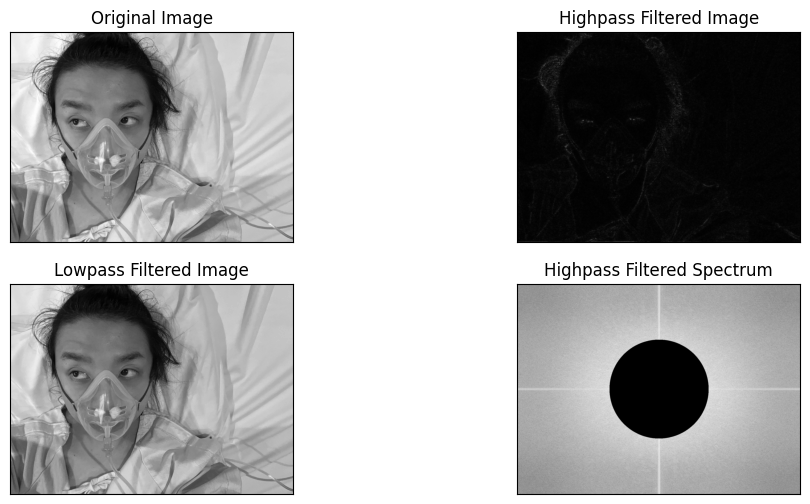

In [35]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def make_mask(img_shape, radius, highpass=True):
    height, width = img_shape
    c_x, c_y = width // 2, height // 2
    mask = np.zeros(img_shape)
    for y in range(height):
        for x in range(width):
            distance_sq = (x - c_x) ** 2 + (y - c_y) ** 2
            if highpass:
                if distance_sq >= radius ** 2:
                    mask[y, x] = 1
            else:
                if distance_sq < radius ** 2:
                    mask[y, x] = 1
    return mask

def apply_filter(img, radius, highpass):
    fshift = np.fft.fftshift(np.fft.fft2(img))
    mask = make_mask(img.shape, radius, highpass)
    fshift_filtered = fshift * mask
    return fshift_filtered

def compute_magnitude_spectrum(fshift):
    magnitude_spectrum = np.log(np.abs(fshift) + 1) # +1 to avoid log(0)
    return magnitude_spectrum

def inverse_fourier_transform(fshift):
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back

# 画像をグレースケールで読み込み
image_path = '/Users/hanya/Documents/UU/3rd/late/optplo/kadai2/kadai3/F_D2gAXX0AAqTXr.jpeg'  # 画像のパスを指定
img = cv2.imread(image_path, 0)

# ハイパスフィルタとローパスフィルタを適用
radius = 300 # フィルタリングの半径を設定 
fshift_highpass = apply_filter(img, radius, highpass=True)
fshift_lowpass = apply_filter(img, radius, highpass=False)

# フーリエスペクトルを計算
magnitude_spectrum_highpass = compute_magnitude_spectrum(fshift_highpass)
magnitude_spectrum_lowpass = compute_magnitude_spectrum(fshift_lowpass)

# 逆フーリエ変換
img_highpass = inverse_fourier_transform(fshift_highpass)
img_lowpass = inverse_fourier_transform(fshift_lowpass)

# 結果を表示
plt.figure(figsize=(12, 6))
plt.subplot(221), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(img_highpass, cmap='gray')
plt.title('Highpass Filtered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(img_lowpass, cmap='gray')
plt.title('Lowpass Filtered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(magnitude_spectrum_highpass, cmap='gray')
plt.title('Highpass Filtered Spectrum'), plt.xticks([]), plt.yticks([])

plt.show()


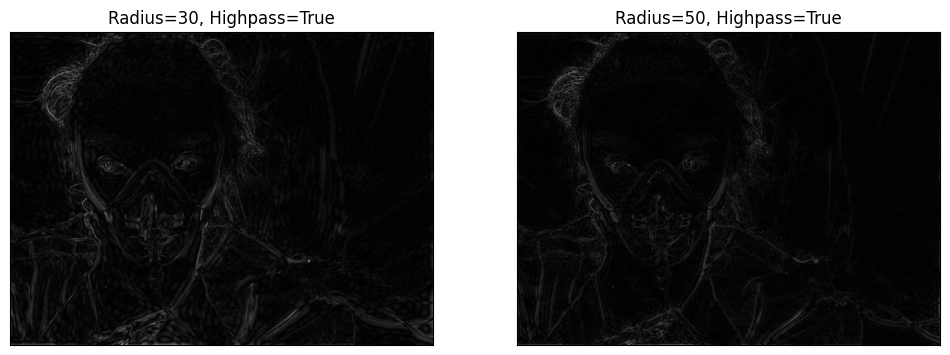

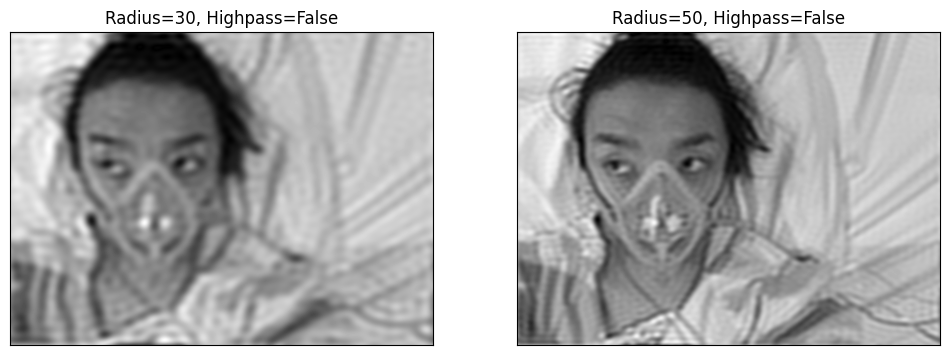

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def make_mask(img_shape, radius, highpass=True):
    height, width = img_shape
    c_x, c_y = width // 2, height // 2
    mask = np.zeros(img_shape)
    for y in range(height):
        for x in range(width):
            distance_sq = (x - c_x) ** 2 + (y - c_y) ** 2
            if highpass:
                if distance_sq >= radius ** 2:
                    mask[y, x] = 1
            else:
                if distance_sq < radius ** 2:
                    mask[y, x] = 1
    return mask

def apply_filter_to_fft(fshift, radius, img_shape, highpass):
    mask = make_mask(img_shape, radius, highpass)
    return fshift * mask

def inverse_fft(fshift_filtered):
    f_ishift = np.fft.ifftshift(fshift_filtered)  # フーリエ変換データのシフトを元に戻す
    img_back = np.fft.ifft2(f_ishift)             # 逆フーリエ変換を実行
    img_back = np.abs(img_back)                   # 結果は複素数なので、絶対値を取る（実部を取得）
    return img_back

def plot_filtered_images(image_path, radius_values, highpass):
    img = cv2.imread(image_path, 0)
    
    fshift = np.fft.fftshift(np.fft.fft2(img))

    plt.figure(figsize=(12, len(radius_values) * 6))
    for i, radius in enumerate(radius_values, 1):
        fshift_filtered = apply_filter_to_fft(fshift, radius, img.shape, highpass)
        img_back = inverse_fft(fshift_filtered)

        plt.subplot(1, len(radius_values), i)
        plt.imshow(img_back, cmap='gray')
        plt.title(f'Radius={radius}, Highpass={highpass}')
        plt.xticks([]), plt.yticks([])
    plt.show()

image_path = '/Users/hanya/Documents/UU/3rd/late/optplo/2023_UU_Holo_plograming/kadai3/F_D2gAXX0AAqTXr.jpeg'
radius_values = [30, 50]

# ハイパスフィルタの結果を表示
plot_filtered_images(image_path, radius_values, highpass=True)

# ローパスフィルタの結果を表示
plot_filtered_images(image_path, radius_values, highpass=False)


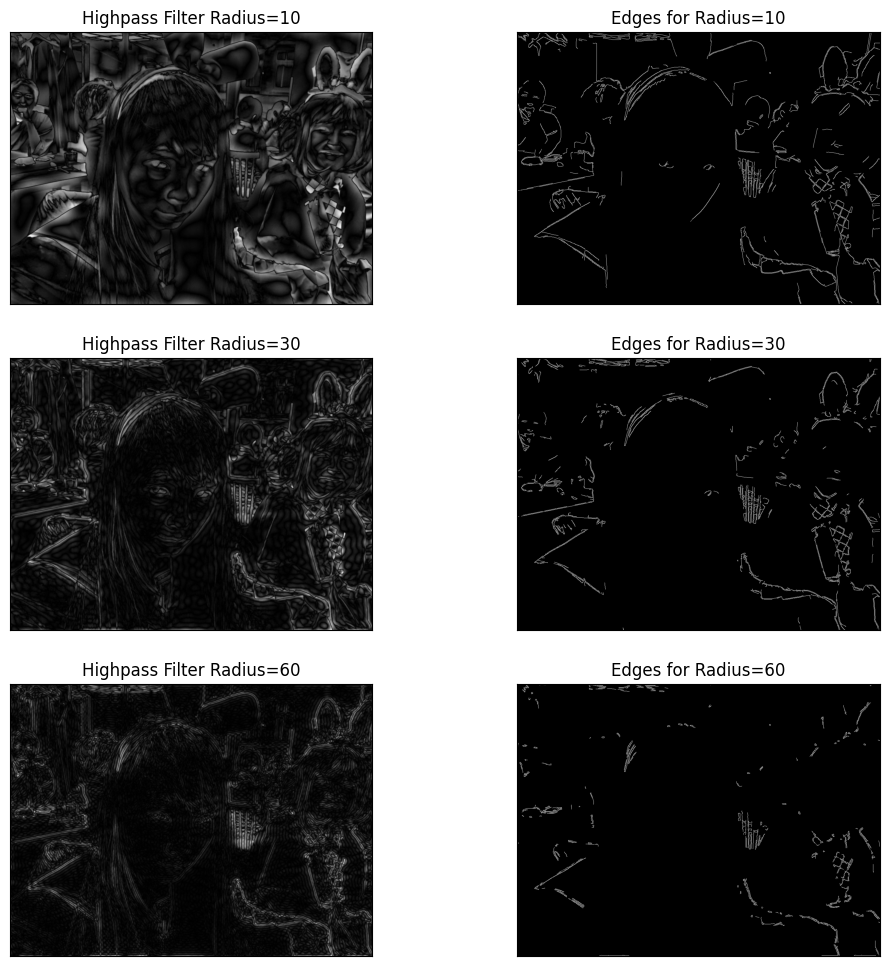

In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def make_highpass_mask(img_shape, radius):
    height, width = img_shape
    c_x, c_y = width // 2, height // 2
    mask = np.zeros(img_shape)
    for y in range(height):
        for x in range(width):
            if (x - c_x) ** 2 + (y - c_y) ** 2 >= radius ** 2:
                mask[y, x] = 1
    return mask

def apply_highpass_filter(img, radius):
    fshift = np.fft.fftshift(np.fft.fft2(img))
    mask = make_highpass_mask(img.shape, radius)
    fshift_filtered = fshift * mask
    img_back = np.fft.ifft2(np.fft.ifftshift(fshift_filtered))
    return np.abs(img_back)

def detect_edges(img):
    return cv2.Canny(img.astype(np.uint8), 100, 200)

def plot_filtering_and_edges(image_path, radius_values):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError("Image not found or path is incorrect")

    plt.figure(figsize=(12, len(radius_values) * 4))
    for i, radius in enumerate(radius_values, 1):
        filtered_img = apply_highpass_filter(img, radius)
        edges = detect_edges(filtered_img)

        plt.subplot(len(radius_values), 2, i * 2 - 1)
        plt.imshow(filtered_img, cmap='gray')
        plt.title(f'Highpass Filter Radius={radius}'), plt.xticks([]), plt.yticks([])

        plt.subplot(len(radius_values), 2, i * 2)
        plt.imshow(edges, cmap='gray')
        plt.title(f'Edges for Radius={radius}'), plt.xticks([]), plt.yticks([])
    plt.show()

# 使用例
image_path = '/Users/hanya/Documents/UU/3rd/late/optplo/kadai2/blurred_ochi20.jpg'
radius_values = [10, 30, 60]
plot_filtering_and_edges(image_path, radius_values)
